In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.rcdefaults()

def seeblau(alpha: float = 1.0):
    """
    Returns an RGBA color simulating alpha by lightening RGB toward white.
    
    Parameters
    ----------
    alpha : float
        Simulated alpha in [0, 1]. RGB is lightened accordingly.
    
    Returns
    -------
    np.ndarray
        RGBA array with alpha=1.0 but RGB blended toward white.
    """
    base_rgb = np.array([86.743, 152.566, 205.880]) / 256
    fake_rgb = base_rgb * alpha + (1 - alpha) * 1.0  # blend with white
    return np.append(fake_rgb, 1.0)  # always fully opaque

def center_highest(values):
    sorted_vals = sorted(values, reverse=True)
    center_sorted = []

    for i, val in enumerate(sorted_vals):
        # Alternate insertion left and right around center
        if i == 0:
            center_sorted.insert(len(center_sorted) // 2, val)  # max in center
        elif i % 2 == 1:
            center_sorted.insert(0, val)  # left
        else:
            center_sorted.append(val)    # right

    return center_sorted


def rank_floats(arr: np.ndarray) -> np.ndarray:
    """
    Maps each float in `arr` to an integer such that the smallest float gets 0,
    the next bigger one gets 1, and so on. Ties get the same rank.

    Parameters
    ----------
    arr : np.ndarray
        1D array of floats.

    Returns
    -------
    np.ndarray
        Integer array of the same shape, with rank values starting from 0.
    """
    unique_sorted = np.unique(arr)
    float_to_rank = {val: i for i, val in enumerate(unique_sorted)}
    return np.vectorize(float_to_rank.get)(arr)

In [109]:
def make_pincode_label(pin_code:list[float] = [.5, .35, .28, .25, .25, .25], bend:float=.5, arrowstyle:str='<->', linewidth:float=2., fig=0, name=None):
    pin_code_unsorted = np.copy(pin_code)
    pin_code = center_highest(pin_code)
    ranks = rank_floats(np.array(pin_code))

    fig, ax = plt.subplots(1,dpi=100, figsize=(3,1.5), num=fig)
    plt.plot([0, .5, 0], [-np.sqrt(2)/4, 0, np.sqrt(2)/4], color="grey", linewidth=2)
    plt.plot([1.5, 1, 1.5], [-np.sqrt(2)/4, 0, np.sqrt(2)/4], color="grey", linewidth=2)

    for i, pin in enumerate(pin_code):
        rad=(-len(pin_code)/2+i+.5)*bend
        color = seeblau(.1+.9*pin)
        distance = 1/10
        temp_linewidth=linewidth*(.5+.5*pin)
        rank=ranks[i]

        arrow = patches.FancyArrowPatch(
        (.5, -rad*distance), (1, -rad*distance),
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle=arrowstyle,
        mutation_scale=10,
        color=color,
        linewidth=temp_linewidth,
        zorder=rank,
        )
        ax.add_patch(arrow)

    # Formatting
    ax.set_xlim(-.1, 1.6)
    ax.set_ylim(-.55, .55)
    ax.set_aspect('equal')
    ax.axis('off')
    plt.tight_layout()
    if name is None:
        plt.savefig(f'label {pin_code_unsorted}.png', dpi=600, bbox_inches='tight')
    else:
        plt.savefig(f'label {name}.png', dpi=600, bbox_inches='tight')

def make_label(G: float| None = None, **kwargs):
    if G is not None:
        x = np.linspace(-np.pi/2, np.pi/2, int(G))
        pin_code = (np.arctan(x)+1)/2
        pin_code[pin_code>1]=1
        pin_code[pin_code<0]=0
        
        make_pincode_label(
            pin_code=list(pin_code), 
            bend=.05, 
            arrowstyle='-', 
            linewidth=1, 
            name=f'{G} G_0',
            **kwargs
            )
    else:
        make_pincode_label(**kwargs)


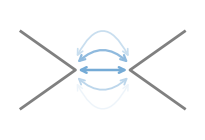

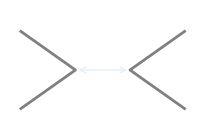

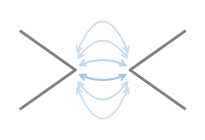

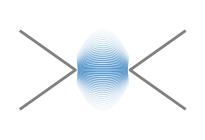

In [111]:
%matplotlib inline
make_label(pin_code=[.8, .63, .33, .25, .01], fig=0)
make_label(pin_code=[.05], fig=1)
make_label(pin_code=[.5, .35, .28, .25, .25, .25], fig=2)
make_label(G=43, fig=3)


In [12]:


G = 1.97 #G_0
pin_code_unsorted = [.5, .35, .28, .25, .25, .25]
T_50_200 = False
T_100 = True
Delta = None # 189 #µeV
V_omega_const = False
nu = 15.0 #15 #GHz
gamma = 0.0136 #0.0146
c= None # .4


pin_code = pin_code_unsorted.copy()
# pin_code.pop(-1)
pin_code = center_highest(pin_code)

fig, ax = plt.subplots(dpi=100, figsize=(3,1.5))

plt.plot([0, .5, 0], [-np.sqrt(2)/4, 0, np.sqrt(2)/4], color="grey", linewidth=2)
plt.plot([1.5, 1, 1.5], [-np.sqrt(2)/4, 0, np.sqrt(2)/4], color="grey", linewidth=2)

for i, pin in enumerate(pin_code):
    rad=(-len(pin_code)/2+i+.5)*.5
    color = seeblau(pin*.9+.1)
    arrow = patches.FancyArrowPatch(
    (.5, -rad/10), (1, -rad/10),
    connectionstyle=f"arc3,rad={rad}",
    arrowstyle='<->',
    mutation_scale=10,
    color=color,
    linewidth=2
    )
    ax.add_patch(arrow)

# Formatting
# ax.set_xlim(-2, 3)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.axis('off')
string = ''
if G is not None:
    string += r"$G_\mathrm{N}=$"+f"${G:.02f}$"+r"$\,G_0$"+"\n"
if T_50_200:
    string += r"$T=50-200\,$mK"+"\n"
if T_100:
    string += r"$T \approx 100\,$mK"+"\n"
if Delta is not None:
    string += r"$\Delta = $"+f"${Delta:d}$"+r"$\,$µeV"+"\n"
if V_omega_const:
    string += r"$V_\mathrm{out} = const.$"+"\n"
if nu is not None:
    string += r"$\nu = $"+f"${nu:.1f}$"+r"$\,$GHz"+"\n"
if gamma is not None:
    string += r"$\gamma = $"+f"${gamma:.4f}$"+"\n"
if c is not None:
    string += f"$c = {c:.1f}$"+"\n"

string += r"$\tau_i = \{$"
for i, tau in enumerate(pin_code_unsorted):
    string += rf"${tau:.2f}$"
    string += ', '
    if i==len(pin_code_unsorted)-1:
        break
    if (i+1)%3==0:
        string += "\n"+r"        $\,$"
    

string = string[:-2]+r"$\}$"

plt.annotate(string, xy=(0,0), xytext=(0, .55),)
# plt.tight_layout()
# plt.show()
plt.savefig('label.png', dpi=600)

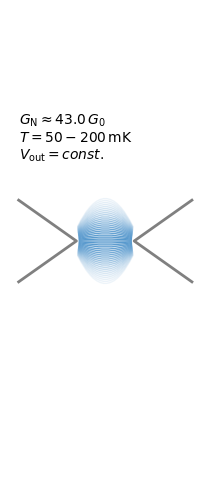

In [257]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def seeblau(alpha: float = 1.):
    return np.array([86.743,  152.566,  205.880, 256*alpha])/256

def center_highest(values):
    sorted_vals = sorted(values, reverse=True)
    center_sorted = []

    for i, val in enumerate(sorted_vals):
        # Alternate insertion left and right around center
        if i == 0:
            center_sorted.insert(len(center_sorted) // 2, val)  # max in center
        elif i % 2 == 1:
            center_sorted.insert(0, val)  # left
        else:
            center_sorted.append(val)    # right

    return center_sorted


G = 43 #G_0
pin_code_unsorted = [1, 1, 1, 1, 1, 1,1 ,1 ,1 ,1,1, 1, 1, 1, 1, 1,1 ,1 ,1 ,1,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8,.8, .5,.5,.5,.5,.5, .5,.5,.5,.5,.5, .1,.1,.1,.1,.1,.1,.1,.1]
x = np.linspace(-np.pi/2, np.pi/2, 43)
pin_code_unsorted = (np.arctan(x)+1)/2

# plt.plot(x, pin_code_unsorted)

T_50_200 = True
T_100 = False
Delta = None # 189 #µeV
V_omega_const = True
nu = None #15.0 #15 #GHz
gamma = None # 0.0197 #0.0146
c= None # .4


pin_code = pin_code_unsorted.copy()
# pin_code.pop(-1)
pin_code = center_highest(pin_code)
pin_code = np.array(pin_code)
pin_code[pin_code>1]=1
pin_code[pin_code<0]=0

fig, ax = plt.subplots(dpi=100, figsize=(3,6))

plt.plot([0, .5, 0], [-np.sqrt(2)/4, 0, np.sqrt(2)/4], color="grey", linewidth=2)
plt.plot([1.5, 1, 1.5], [-np.sqrt(2)/4, 0, np.sqrt(2)/4], color="grey", linewidth=2)

for i, pin in enumerate(pin_code):
    rad=(-len(pin_code)/2+i+.5)*.05
    color = seeblau(pin*.9+.1)
    arrow = patches.FancyArrowPatch(
        (.5, -rad/10), (1, -rad/10),
        connectionstyle=f"arc3,rad={rad}",
        arrowstyle='-',
        mutation_scale=3,
        color=color,
        linewidth=1
        )
    ax.add_patch(arrow)

# Formatting
# ax.set_xlim(-2, 3)
ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.axis('off')
string = ''
if G is not None:
    string += r"$G_\mathrm{N}\approx$"+f"${G:.1f}$"+r"$\,G_0$"+"\n"
if T_50_200:
    string += r"$T=50-200\,$mK"+"\n"
if T_100:
    string += r"$T \approx 100\,$mK"+"\n"
if Delta is not None:
    string += r"$\Delta = $"+f"${Delta:d}$"+r"$\,$µeV"+"\n"
if V_omega_const:
    string += r"$V_\mathrm{out} = const.$"+"\n"
if nu is not None:
    string += r"$\nu = $"+f"${nu:.1f}$"+r"$\,$GHz"+"\n"
if gamma is not None:
    string += r"$\gamma = $"+f"${gamma:.4f}$"+"\n"
if c is not None:
    string += f"$c = {c:.1f}$"+"\n"

# string += r"$\tau_i = \{$"
# for i, tau in enumerate(pin_code_unsorted):
#     string += rf"${tau:.2f}$"
#     string += ', '
#     if i==len(pin_code_unsorted)-1:
#         break
#     if (i+1)%3==0:
#         string += "\n"+r"        $\,$"
    

# string = string[:-2]+r"$\}$"

plt.annotate(string, xy=(0,0), xytext=(0, .55),)
# plt.tight_layout()
# plt.show()
plt.savefig('label.png', dpi=600)

In [254]:
pin_code_unsorted

array([0.        , 0.0092202 , 0.02118166, 0.03401563, 0.04780228,
       0.06262832, 0.07858664, 0.0957756 , 0.1142976 , 0.13425681,
       0.15575578, 0.17889062, 0.20374452, 0.23037942, 0.25882605,
       0.28907266, 0.32105355, 0.35463898, 0.38962861, 0.42575081,
       0.46266961, 0.5       , 0.53733039, 0.57424919, 0.61037139,
       0.64536102, 0.67894645, 0.71092734, 0.74117395, 0.76962058,
       0.79625548, 0.82110938, 0.84424422, 0.86574319, 0.8857024 ,
       0.9042244 , 0.92141336, 0.93737168, 0.95219772, 0.96598437,
       0.97881834, 0.9907798 , 1.        ])

In [101]:
pin_code

[0.8, 0.33, 0.01, 0.25, 0.63]

In [27]:
T_theo

array([0.   , 0.05 , 0.275, 0.04 , 0.075, 0.03 , 0.925, 0.475, 0.02 ,
       0.675, 0.01 , 0.15 , 0.175, 0.99 , 0.7  , 0.6  , 0.98 , 0.65 ,
       0.4  , 0.5  , 0.375, 0.775, 0.1  , 0.75 , 0.825, 0.2  , 0.3  ,
       0.575, 0.425, 0.85 , 0.625, 0.45 , 0.96 , 0.55 , 0.8  , 0.9  ,
       0.225, 0.97 , 0.95 , 0.025, 0.725, 0.25 , 0.875, 1.   , 0.525,
       0.125, 0.35 , 0.325])